# ***Analyzing Amazon Product Reviews Data***

***Herambeshwar Pendyala | 01130541 | hpend001@odu.edu***

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRfsNxWyYZyYJ1Ob6zdI-OprPC4E-4cFqhJYcNKfixguoFmzwtH)

### ***1. Introduction***

E-commerce has revolutionized the way we shop. Looking to just a search and a few clicks away. Items are delivered within a matter of days (sometimes even the same day!). 

E-commerce is an industry which generates a lot of data daily, Data analysis can help us generating some meaningful insights from data, Amazon is one such e-commerce giant implementing such techniques to improve customer satisfaction and increase the revenue.  
 
Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazon’s iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. Over 130+ million customer reviews are available to researchers as part of this dataset.


### ***Importance of Online Reviews***

Many times while purchazing an item online people see the ratings, but ratings alone do not give a complete picture of the products we wish to purchase. So, as a precautionary measure, people tend to read a product’s reviews before deciding whether to buy it or not.

Online product reviews are a great source of information for consumers. From the seller's point of view, online reviews can be used to gauge the consumers’ feedback on the products or services they are selling.

### ***Problem of Fake Reviews***

Online reviews have become an important factor when people make purchase and business decisions. The increasing popularity of online reviews also stimulates the business of fake review writing, which refers to paid human writers producing deceptive reviews to influence readers’ opinions. Such fake reviews can create problems to customers who are accustomed to reading reviews before making a final purchase decision as the decisions are possibly influenced by non-consumers. This project aims to eliminate fake reviews as accurate as possible.

### ***Sentiment Analysis***

Customer satisfaction is the key to business success. it’s key for companies to pay close attention to Voice of Customer to improve the customer experience. By analyzing and getting insights from customer feedback, companies have better information to make strategic decisions, an accurate understanding of what the customer actually wants and, as a result, a better experience for the customer. To achieve this we can use the concept of sentiment analysis on the product reviews that we get as a feedback from customer.

Sentiment Analysis is the automated process of understanding the sentiment or opinion of a given text. This machine learning tool can provide insights by automatically analyzing product reviews and separating them into tags: Positive, Neutral, Negative.

### ***Recommender System***

Online stores have millions of products available in their catalogs. Finding the right product becomes difficult because of this ‘Information overload’. Users get confused and this puts a cognitive overload on the user in choosing a product.

Recommender systems help customers by suggesting probable list of products from which they can easily select the right one. They make customers aware of new and/or similar products available for purchase by providing comparable costs, features, delivery times etc.

In many ways, recommender systems were a catalyst for the current popularity of machine learning. One of Amazon's earliest successes was the "Customers who bought this, also bought..." feature, while the million dollar Netflix Prize spurred research, raised public awareness, and inspired numerous other data science competitions.

![alt text](https://main-inspirationfeed.netdna-ssl.com/wp-content/uploads/2016/05/Impact-of-Recommendation-Engine-on-Amazon-and-Netflix-3.jpg)


### ***About the Dataset***

The dataset contains the customer review text with accompanying metadata, consisting of three major components:

A collection of reviews written in the Amazon.com marketplace and associated metadata from 1995 until 2015. This is intended to facilitate study into the properties (and the evolution) of customer reviews potentially including how people evaluate and express their experiences with respect to products at scale. (130M+ customer reviews).

A collection of reviews that have been identified as non-compliant with respect to Amazon policies. This is intended to provide a reference dataset for research on detecting promotional or biased reviews. (several thousand customer reviews). This part of the dataset is distributed separately and is available upon request.

As the Dataset is large (~140GB), I have taken a subset of dat from a catergory 'Books, Electronics' 


Dataset URL : [Products dataset](https://jmcauley.ucsd.edu/data/amazon/index.html)



We will also try to augment this dataset with another datasets in [Products MetaData](https://jmcauley.ucsd.edu/data/amazon/index.html), [AWS Open Registory](https://s3.amazonaws.com/amazon-reviews-pds/readme.html),  to give accurate recommendations to the customer.


### ***Proposed Flow of the Model***


Data Cleaning --> Data Preprocessing --> Analyzing Reviews by Exploratory Data Analysis --> Sentiment Analysis of Reviews (Generating Good and Bad Reviews) --> Product Recommendations based on the reviews and overall score.



Building a model that tries to solve below problems
1.   Sentiment Analysis on Product reviews.
2.   Product Recommendations based on the reviews and overall score.


### ***Citiation for Dataset***

- R. He, J. McAuley. Modeling the visual evolution of fashion trends with one-class collaborative filtering. WWW, 2016
- J. McAuley, C. Targett, J. Shi, A. van den Hengel. Image-based recommendations on styles and substitutes. SIGIR, 2015


In [0]:
#---- Library used in sentiment Analysis
!pip install vaderSentiment

     |████████████████████████████████| 133kB 3.5MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [0]:
#--- Import libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import numpy as np
import pandas as pd
from pandas import DataFrame
import gzip

import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import warnings
warnings.filterwarnings("ignore")

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud, STOPWORDS

% matplotlib inline
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def return_dict(file):
  yield eval(file)

def parse(path):
  g = gzip.open(path, 'rb')
  return map(return_dict, g)
  """
  for l in g:
    yield eval(l)

  """
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')


#paths
electronics_path = "https://www.cs.odu.edu/~hpendyal/courses/cs620/project/dataset/Electronics_5.json"

#meta data
electronicsMetaPath = "https://www.cs.odu.edu/~hpendyal/courses/cs620/project/dataset/meta_Electronics.json"

In [0]:
%%time
#---- Reading Electronics data
Electronics = pd.read_json(electronics_path, lines=True)
print('-> Total reviews : ',Electronics.reviewText.count())
print("Data Loading completed in ")

-> Total reviews :  1689188
Data Loading completed in 
CPU times: user 23.9 s, sys: 11.2 s, total: 35.2 s
Wall time: 48.4 s


In [0]:
Electronics.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [0]:
%%time
#--- Reading Electronics MetaData
electronics_meta = pd.read_json(electronicsMetaPath,lines=True)
print('--> Number of products : ',electronics_meta.title.count())
print("Data Loading completed in ")

--> Number of products :  491192
Data Loading completed in 
CPU times: user 16.7 s, sys: 1.2 s, total: 17.9 s
Wall time: 24.4 s


In [0]:
#--- Removing 'imUrl' as we are not using it for any purpose(Those are basically for images)
electronics_meta = electronics_meta[['asin','description','categories','title','price','salesRank','related','brand']]
electronics_meta.head()

,asin,description,categories,title,price,salesRank,related,brand
0,0132793040,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [0]:
Electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
reviewerID        1689188 non-null object
asin              1689188 non-null object
reviewerName      1664458 non-null object
helpful           1689188 non-null object
reviewText        1689188 non-null object
overall           1689188 non-null int64
summary           1689188 non-null object
unixReviewTime    1689188 non-null int64
reviewTime        1689188 non-null object
dtypes: int64(2), object(7)
memory usage: 116.0+ MB


### ***2. Exploratory Data Analysis***

In [0]:
#--- split the date into seperate columns of date month and year
%%time
pklPath = '/content/drive/My Drive/ODU/CourseWork/CS - 620 | F19 | Intro to Data Science/Project/Electronics_split.pkl'
Electronics = pd.read_pickle(pklPath)

CPU times: user 5.37 s, sys: 1.59 s, total: 6.96 s
Wall time: 12.5 s


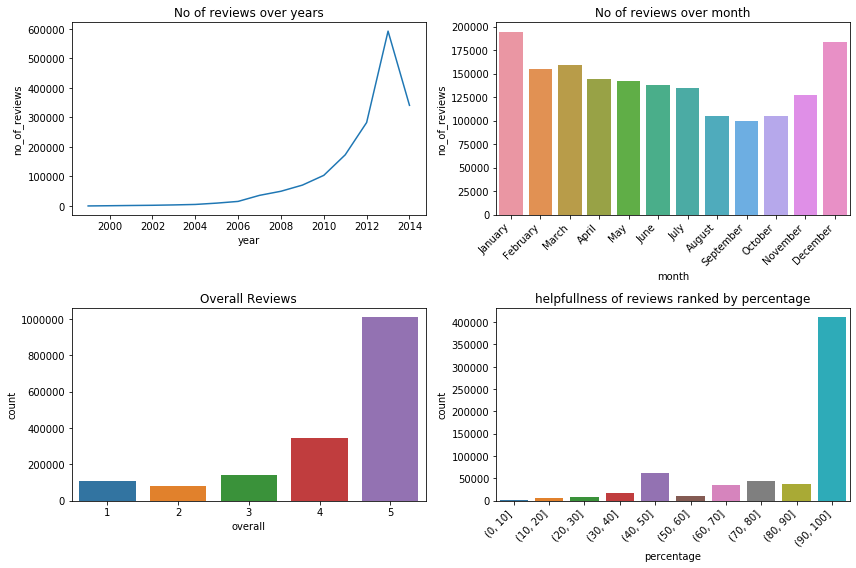

In [0]:
f, axes = plt.subplots(2,2, figsize=(12,8))
#--- Yearly Reviews
yearly = Electronics.groupby(['year'])['reviewerID'].count().reset_index()
yearly = yearly.rename(columns={'reviewerID':'no_of_reviews'})
yearChart = sns.lineplot(x='year',y='no_of_reviews',data=yearly, ax = axes[0,0])
yearChart.set_title('No of reviews over years')

#--- Monthly Reviews
monthly = Electronics.groupby(['month'])['reviewerID'].count().reset_index()
monthly['month'] = monthly['month'].apply(lambda x : calendar.month_name[x])
monthly = monthly.rename(columns={'reviewerID':'no_of_reviews'})
monthChart = sns.barplot(x='month',y='no_of_reviews',data=monthly, ax = axes[0,1])
monthChart.set_title('No of reviews over month')
monthChart.set_xticklabels(monthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

#-- Getting overall ratings for every electronics products
#Electronics['overall'].value_counts().plot(kind='bar')
sns.countplot(x = 'overall', data = Electronics, ax = axes[1,0] ).set_title('Overall Reviews')

#--- helpfulness of review.
helpfulness = Electronics[['helpful','asin']]
helpfulness[['helpfulVotes','totalVotes']] = pd.DataFrame(helpfulness.helpful.values.tolist(), index=helpfulness.index)
helpfulness = helpfulness.drop(['helpful'], axis = 1)
#--- calculating helpfulness Percentage
helpfulness['percentage'] = (helpfulness.helpfulVotes/helpfulness.totalVotes)*100
helpfulness = helpfulness.fillna(0)
final_helpfullness = helpfulness.groupby(pd.cut(helpfulness.percentage,np.arange(0,101,10))).count()
final_helpfullness = final_helpfullness.rename(columns={'percentage':'count'})
final_helpfullness = final_helpfullness.reset_index()
helpfullnessChart = sns.barplot(x='percentage',y='count',data=final_helpfullness, ax = axes[1,1])
helpfullnessChart.set_title('helpfullness of reviews ranked by percentage')
helpfullnessChart.set_xticklabels(helpfullnessChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

f.tight_layout()


***Rating Trend over the years***
- There is an increasing trend for number of ratings given by the users to products on Amazon which indicates that a greater number of users started using the Amazon e-commerce site for online shopping and a greater number of users started giving feedback on the products purchased from 2000 to 2014. There is a significant increase in number of ratings given by users from 2012 to 2014.
- Notice the peak on 2013. Further analysis will show that this happened on November of that year. Two major events support these findings. The first one is that on that month, Amazon began to offer Sunday delivery option for purchases. See [news article](https://www.cnet.com/news/amazon-to-begin-offering-sunday-delivery-option-for-purchases/) here. That surely resulted in lots of new members and new ratings&reviews. The second one is obviously black friday...

***Distribution of overall ratings***
- Many users have given a rating of 5 to products followed by 4 and 3 whereas very few users have given a low rating of 1 or 2.


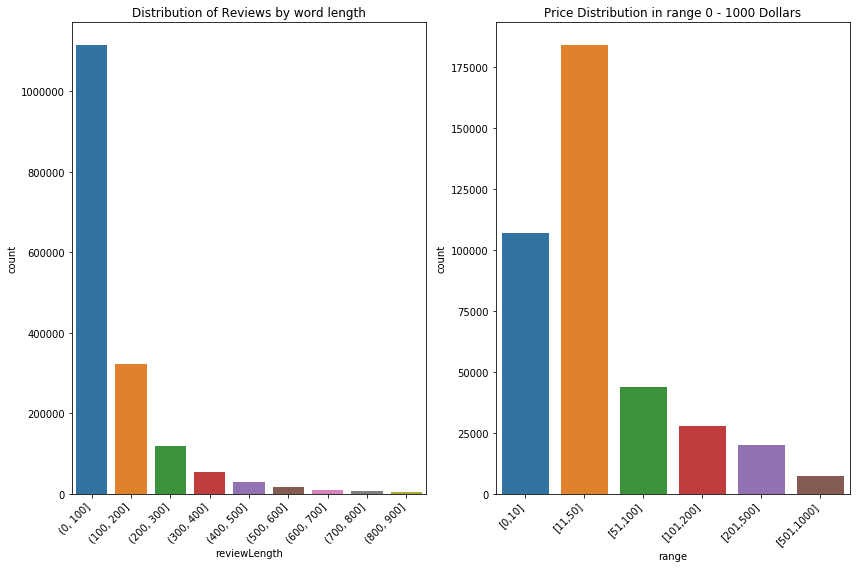

In [0]:
f, axes = plt.subplots(1,2, figsize=(12,8))
#---- Distribution of word reviews by length
Electronics_reviews = Electronics[['asin','reviewerID','reviewerName','reviewText','summary','overall']]
Electronics_reviews['reviewLength'] = Electronics_reviews['reviewText'].apply(lambda x: len(x.split()))
#Electronics_reviews.head()
reviews_word_length = Electronics_reviews.groupby(pd.cut(Electronics_reviews.reviewLength, np.arange(0,1000,100))).count()
reviews_word_length = reviews_word_length.rename(columns={'reviewLength':'count'})
reviews_word_length = reviews_word_length.reset_index()
#print(reviews_word_length)
reviewLengthChart = sns.barplot(x='reviewLength',y='count',data=reviews_word_length, ax = axes[0])
reviewLengthChart.set_title('Distribution of Reviews by word length')
reviewLengthChart.set_xticklabels(reviewLengthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

#--- Products, Distribution of prices of products
#---max price of the produc = 999.99
#--- Splitting the data into range
price10=electronics_meta[(electronics_meta.price > 0) & (electronics_meta.price <= 10)]
price50=electronics_meta[(electronics_meta.price > 10) & (electronics_meta.price <= 50)]
price100=electronics_meta[(electronics_meta.price > 50) & (electronics_meta.price <= 100)]
price200=electronics_meta[(electronics_meta.price > 100) & (electronics_meta.price <= 200)]
price500=electronics_meta[(electronics_meta.price > 200) & (electronics_meta.price <= 500)]
price1000=electronics_meta[(electronics_meta.price > 500) & (electronics_meta.price <= 1000)]
#--- creating a list to create a dataframe further
priceDist = []
priceDist.append(('[0,10]',price10.shape[0]))
priceDist.append(('[11,50]',price50.shape[0]))
priceDist.append(('[51,100]',price100.shape[0]))
priceDist.append(('[101,200]',price200.shape[0]))
priceDist.append(('[201,500]',price500.shape[0]))
priceDist.append(('[501,1000]',price1000.shape[0]))
#--- Creating DataFrame
priceDist = pd.DataFrame(priceDist,columns=['range','count'])
priceDistChart = sns.barplot(x='range',y='count',data=priceDist, ax = axes[1])
priceDistChart.set_title('Price Distribution in range 0 - 1000 Dollars')
priceDistChart.set_xticklabels(priceDistChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

f.tight_layout()


CPU times: user 4.03 s, sys: 317 ms, total: 4.34 s
Wall time: 3.95 s


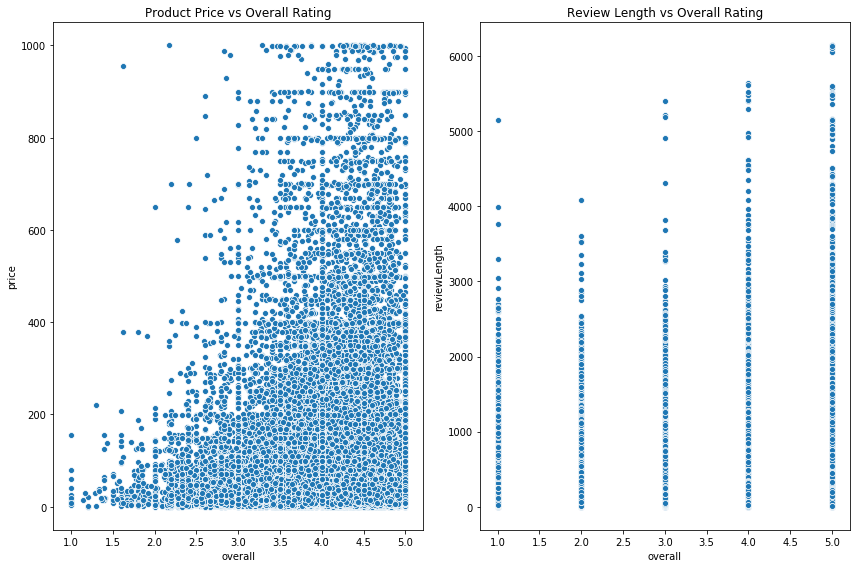

In [0]:
%%time
f, axes = plt.subplots(1,2, figsize=(12,8))
#--- Distribution of product Price vs overall Ratings of products by users
#--- got data of 63001 products
averageProductRatings = Electronics.groupby('asin')['overall'].mean().reset_index()
productPrices = electronics_meta[['asin','price']]
price_vs_rating = pd.merge(averageProductRatings, productPrices, on='asin', how='inner') #--- in this way we will be dealing with only common products
price_vs_ratingChart = sns.scatterplot(x='overall', y='price', data=price_vs_rating, ax = axes[0])
price_vs_ratingChart.set_title('Product Price vs Overall Rating')

#--- Distribution of length of reviews vs overall rating
reviewLength_vs_Rating = Electronics_reviews[['asin','reviewLength','overall']]
reviewLength_vs_Rating = sns.scatterplot(x='overall', y='reviewLength', data=reviewLength_vs_Rating, ax = axes[1])
reviewLength_vs_Rating.set_title('Review Length vs Overall Rating')

f.tight_layout()

from the above plot we can see that most of the reviews come under 3 - 5 for a price range of 200 - 400. and rating and review length are relted to each other.

CPU times: user 178 ms, sys: 0 ns, total: 178 ms
Wall time: 176 ms


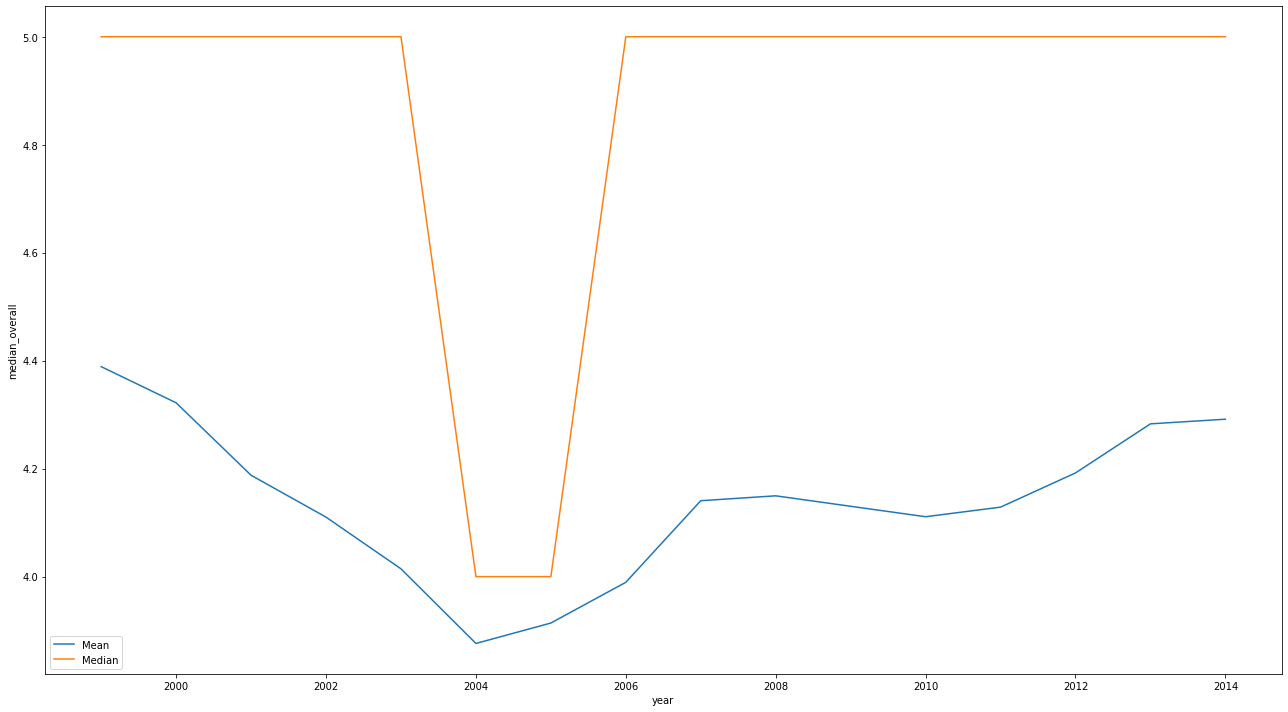

In [0]:
%%time
#--- mean median and mode of overall ratings
f = plt.figure(figsize=(18,10))
#---mean
stat_reviews_yearly = Electronics.groupby(['year'])['overall'].mean().reset_index()
stat_reviews_yearly = stat_reviews_yearly.rename(columns={'overall':'mean_overall'})
#---median
median_yearly = Electronics.groupby(['year'])['overall'].median().reset_index()
stat_reviews_yearly['median_overall'] = median_yearly['overall']
#--- plotting the values
sns.lineplot(x='year',y='mean_overall',data=stat_reviews_yearly, label = 'Mean')
sns.lineplot(x='year',y='median_overall',data=stat_reviews_yearly, label = 'Median')
f.tight_layout()

Looking at above plot, we can infer that over the years 2000 to 2004, the mean rating of the products has reduced and then increaased at a slow rate till 2014 but still is much lower than before 2000. Median of ratings given to products remains at 5 from 2000 to 2014 except for years 2004 and 2006

In [0]:
# #---mode
Electronics.groupby(['year'])['overall'].value_counts()

year  overall
1999  5              49
      4              12
      2               6
      3               3
      1               2
                  ...  
2014  5          215229
      4           63914
      3           27594
      1           19265
      2           15186
Name: overall, Length: 80, dtype: int64

In [0]:
electronics_meta.head()

,asin,description,categories,title,price,salesRank,related,brand
0,0132793040,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [0]:
#--- get the unique products in products list
len(Electronics['reviewerID'].unique())

192403

In [0]:
reviewLength = Electronics_reviews[['asin','reviewLength']]
print(reviewLength.count())
print(helpfulness.count())

asin            1689188
reviewLength    1689188
dtype: int64
asin            1689188
helpfulVotes    1689188
totalVotes      1689188
percentage      1689188
dtype: int64


In [0]:
#--- 9995 unique brands in 491192 products
productCategories = pd.DataFrame(electronics_meta.categories.values.tolist(), index = electronics_meta.categories.index)
productCategories.loc[:, productCategories.isna().any()] #--- to select those columns (containing at least one NaN value)
#--- removing the null columns
productCategories = productCategories.drop([1,2,3,4,5,6,7,8,9,10,11,12],axis = 1)
productCategories = productCategories.rename(columns={0:'categories'})
#--- removing the null columns
productCategories = pd.DataFrame(productCategories.categories.values.tolist(), index = productCategories.categories.index)
#--- Splitting the columns to get more products
productCategories = productCategories.rename(columns={0:'mainCategory',1:'subCategory1',2:'subCategory2',3:'subCategory3',4:'subCategory4',5:'subCategory5'})
#--- Remove Duplicates
productCategories_ND = productCategories.drop_duplicates()
productCategories_ND.head()
electronicsCategories = productCategories_ND[productCategories_ND['mainCategory'] == 'Electronics']
electronicsCategories = electronicsCategories.reset_index()
electronicsCategories
#electronicsCategories.subCategory1.unique()
#categoryChart = sns.scatterplot(x='mainCategory',y='subCategory1', size='mainCategory', data=productCategories)

,index,mainCategory,subCategory1,subCategory2,subCategory3,subCategory4,subCategory5
0,0,Electronics,Computers & Accessories,Cables & Accessories,Monitor Accessories,None,None
1,2,Electronics,Computers & Accessories,"PDAs, Handhelds & Accessories",PDAs & Handhelds,None,None
2,3,Electronics,Accessories & Supplies,Audio & Video Accessories,Remote Controls,TV Remote Controls,None
3,4,Electronics,GPS & Navigation,Vehicle GPS,Trucking GPS,None,None
4,5,Electronics,Accessories & Supplies,Audio & Video Accessories,Headphones,None,None
...,...,...,...,...,...,...,...
803,430602,Electronics,Television & Video,HD DVD Players,None,None,None
804,434915,Electronics,Cell Phones & Accessories,None,None,None,None
805,447373,Electronics,Computers & Accessories,Warranties & Services,Installation Services,None,None
806,451514,Electronics,Television & Video,Televisions,OLED TVs,None,None


            reviewerID  no of reviews
160874    ADLVFFE4VBT8            431
136885  A3OXHLG6DIBRW8            407
150917    A6FIAB28IS79            367
150637   A680RUE1FDO8B            352
149640   A5JLAU2ARJ0BO            351

   no of reviews  count
0              5  59094
1              6  36088
2              7  23840
3              8  16596
4              9  11560


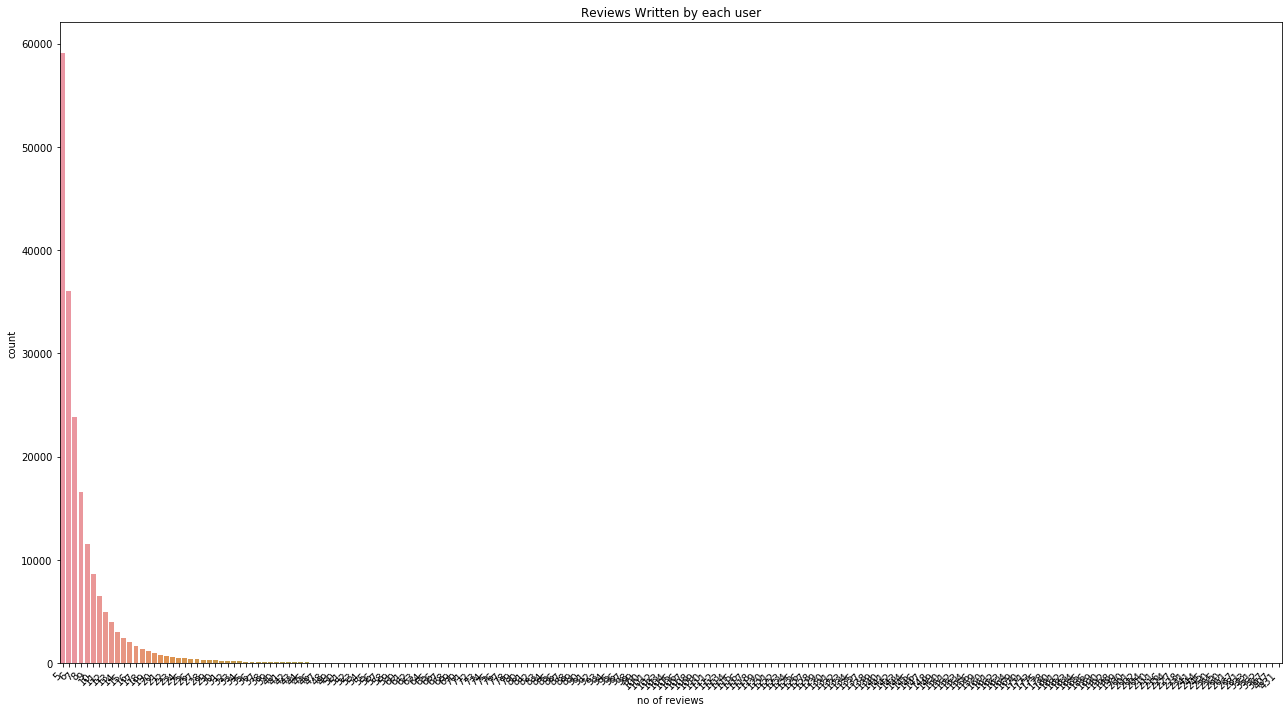

In [0]:
#--- Distribution of number of reviews written by each user
f = plt.figure(figsize=(18,10))
userReviews = Electronics[['reviewerID','asin']]
userReviews = userReviews.groupby(['reviewerID']).count().reset_index()
userReviews = userReviews.sort_values('asin',ascending = False)
userReviews = userReviews.rename(columns={'asin':'no of reviews'})
print(userReviews.head())

userReviews1 = userReviews.groupby('no of reviews')['reviewerID'].count().reset_index()
userReviews1 = userReviews1.rename(columns={'reviewerID':'count'})
print()
print(userReviews1.head())
userReviewChart = sns.barplot(x = 'no of reviews',y = 'count',data = userReviews1)
userReviewChart.set_title('Reviews Written by each user')
userReviewChart.set_xticklabels(userReviewChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
f.tight_layout()

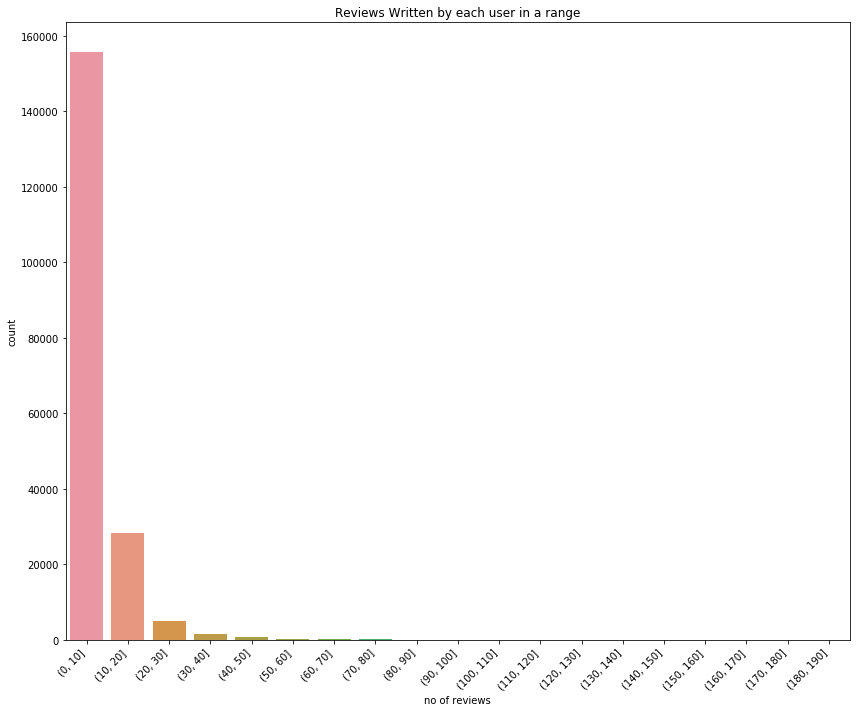

In [0]:
f = plt.figure(figsize=(12,10))
userReviews2 = userReviews1.groupby(pd.cut(userReviews1['no of reviews'],np.arange(0,200,10))).sum()
userReviews2 = userReviews2.rename(columns={'no of reviews':'range of reveiws'})
userReviews2 = userReviews2.reset_index()
userReviewChart = sns.barplot(x='no of reviews',y='count',data=userReviews2)
userReviewChart.set_title('Reviews Written by each user in a range')
userReviewChart.set_xticklabels(userReviewChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
f.tight_layout()

on an average each user gives 5 reviews and most reviewed user has given 430 reviews for all the different products, facts and figures are shown below in recommender system as it gives us a better understanding of the user.

### ***3. Data Cleaning***

Data preprocessing and cleaning is an important step before any text processing  task, in this step, we will remove the punctuations, stopwords and normalize the reviews as much as possible.

#### ***3.1 Handling Duplicate data***

There exist a lot of duplicates wherein the different products is reviewed by same user at the same time
The product ID may be different but the product is similar with different variant.

In [0]:
Electronics.duplicated(subset={"reviewerID","reviewerName","reviewTime","reviewText"}).value_counts()

False    1689188
dtype: int64

In [0]:
ElectronicsFinal = Electronics[Electronics['reviewerID'] == 'AMO214LNFCEI4']
#Electronics.head()
ElectronicsFinal

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,month,year
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,2010-11-25,11,2010
493983,AMO214LNFCEI4,B001MSVPM6,Amazon Customer,"[0, 0]",Using this cable to connect HiSense Sero Lite ...,5,Great product,1384387200,2013-11-14,11,2013
815800,AMO214LNFCEI4,B003S6CO9I,Amazon Customer,"[15, 16]","The blurb says ""great for charging iPhones, iP...",1,NOT as advertised,1313107200,2011-08-12,8,2011
1286190,AMO214LNFCEI4,B007B31IAK,Amazon Customer,"[0, 0]",It's OK. Wish it could stand up in either por...,3,It's OK.,1384387200,2013-11-14,11,2013
1626284,AMO214LNFCEI4,B00DSTUVHW,Amazon Customer,"[0, 0]","The case is OK for the price, considering how ...",3,It's OK.,1384387200,2013-11-14,11,2013


In the above data we can see that 'Amazon Customer' gave the multiple product reviews [ 'B001MSVPM6' , 'B007B31IAK' , 'B00DSTUVHW' ] at the same time which is not possible ethically, the product were same but different flavours hence counted as multiple products, this can be seen from below.


In [0]:
electronics_meta.loc[electronics_meta.asin.isin(ElectronicsFinal.asin.values.tolist())]

,asin,description,categories,title,price,salesRank,related,brand
4,0528881469,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
123047,B001MSVPM6,Mediabridge FLEX Series Mini-HDMI to HDMI Cabl...,"[[Electronics, Accessories & Supplies, Audio &...",Mediabridge FLEX Series Mini-HDMI to HDMI Cabl...,9.99,NaN,"{'also_bought': ['B004286VMW', 'B004LTE5JI', '...",NaN
195527,B003S6CO9I,XTG Technology's DC and 4 USB ChargerCharge Up...,"[[Electronics, Car & Vehicle Electronics, Vehi...","5-in-1 Auto Charger, 4-Port USB Car Charger an...",14.99,NaN,"{'also_bought': ['B00CMKS3E6', 'B007JPSEP2', '...",NaN
320801,B007B31IAK,Give the Poetic brand a try to protect your de...,"[[Electronics, Computers & Accessories, Touch ...",Poetic(TM) Cover Mate Plus case for Apple's iP...,1.95,NaN,"{'also_viewed': ['B00IHTAXVC', 'B00BNQYIUS', '...",NaN
447133,B00DSTUVHW,"Poetic, an Exact Design Inc Brand, warrants th...","[[Electronics, Computers & Accessories, Touch ...",Poetic Slimbook Case for Hisense Sero 7 Lite L...,14.95,NaN,"{'also_bought': ['B00DBH99PG', 'B00FTV55VY', '...",NaN


In [0]:
#Deleting all the duplicates having the same userID, Profile, NameTime and Text all in the same column.
ElectronicsFinal =  Electronics.drop_duplicates(subset={"reviewerID","reviewerName","reviewTime","reviewText"},keep="first")

In [0]:
size_diff = ElectronicsFinal['asin'].size/Electronics['asin'].size
print("%.1f %% reduction in data after deleting duplicates"%((1-size_diff)*100))
print("Size of data",ElectronicsFinal['asin'].size," rows ")

#---- Data is cleaned and no Duplicates are there

0.0 % reduction in data after deleting duplicates
Size of data 1689188  rows 


#### ***3.2 Text Preprocessing***

As the review is mostly text data, we might need to clean the data to gain some useful insights from the data 

In [0]:
#--- HTML Tag Removal
import re #Regex (Regular Expr Operations)
#string = r"sdfsdfd" :- r is for raw string as Regex often uses \ backslashes(\w), so they are often raw strings(r’\d’)
########Function to remove html tags from data
def striphtml(data):
    p = re.compile('<.*?>')#Find this kind of pattern
    #print(p.findall(data))#List of strings which follow the regex pattern
    return p.sub('',data) #Substitute nothing at the place of strings which matched the patterns

striphtml('<a href="foo.com" class="bar">My Name is  <b>Heramb Pendyala!</b></a><>')

'My Name is  Heramb Pendyala!'

In [0]:
#--- Punctuation removal
########Function to remove All the punctuations from the text
def strippunc(data):
    p = re.compile(r'[?|!|\'|"|#|.|,|)|(|\|/|~|%|*]')
    return p.sub('',data)
strippunc("Heramb*?~,,,( Pendyala)#")

'Heramb Pendyala'

In [0]:
#--- StopWords

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = stopwords.words('english') #All the stopwords in English language
#excluding some useful words from stop words list as we doing sentiment analysis
excluding = ['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stop = [words for words in stop if words not in excluding]
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's',

In [0]:
from nltk.stem import SnowballStemmer
snow = SnowballStemmer('english') #initialising the snowball stemmer
print("Stem/Root words of the some of the words using SnowBall Stemmer:")
print(snow.stem('tasty'))
print(snow.stem('tasteful'))
print(snow.stem('tastiest'))
print(snow.stem('delicious'))
print(snow.stem('amazing'))
print(snow.stem('amaze'))
print(snow.stem('initialize'))
print(snow.stem('fabulous'))
print(snow.stem('Honda City'))
print(snow.stem('unpleasant'))

Stem/Root words of the some of the words using SnowBall Stemmer:
tasti
tast
tastiest
delici
amaz
amaz
initi
fabul
honda c
unpleas


In [0]:
%%time
#pre-processing output for one Review
def preprocessText(text, stem=False):
  filtered_sentence = []
  final_string = []
  #print(text)
  text = striphtml(text) #--- remove HTML Tags
  text = strippunc(text) #--- remove Punctuation
  for w in text.split(): #--- isalpha() methods returns “True” if all characters in the string are alphabets, Otherwise, It returns “False”.
    if(w.isalpha() and (len(w) > 2)):  #--- Check is value is not numeric and has length > 2
      if(w.lower() not in stop):       #--- Check if it is a stopword
        if stem : 
          s = (snow.stem(w.lower())).encode('utf8') #--- Stemming the word using snowball stemmer
        else:
          s = (w.lower()).encode('utf8') #--- Stemming the word using snowball stemmer
        filtered_sentence.append(s)
      else:
        continue
    else:
      continue
  cleanedText = b" ".join(filtered_sentence) # string of cleaned words
  final_string.append(cleanedText)
  return final_string

print('---- Uncleaned Text ----')
print(ElectronicsFinal.reviewText[0])
print('---- Cleaned Text ----')
print(preprocessText(ElectronicsFinal.reviewText[0],True))
print()
print('---- Cleaned Text (without Stemming)----')
print(preprocessText(ElectronicsFinal.reviewText[0]))
print()

print("Preprocessing completed in ")



---- Uncleaned Text ----
We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!
---- Cleaned Text ----
[b'got gps husband otr road trucker impress ship time arriv day earlier expect within week use howev start freez could glitch unit work great work

***Note*** : Data is already preprocessed and cleaned so we will be reading the cleaned data from the .pkl file

In [0]:
Electronics_main = Electronics.copy(deep = True)
#pklpath = "/content/drive/My Drive/ODU/CourseWork/CS - 620 | F19 | Intro to Data Science/Project/Electronics_Cleaned.pkl" #--- Stemmed Reviews
pklpath = "/content/drive/My Drive/ODU/CourseWork/CS - 620 | F19 | Intro to Data Science/Project/Electronics_Cleaned_NO_STEM.pkl" #--- NON Stemmed Reviews
Electronics = pd.read_pickle(pklpath)
Electronics.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,month,year,cleanedReview,helpfulVotes,totalVotes
0,AO94DHGC771SJ,0528881469,amazdnu,We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,2013-06-02,6,2013,[b'got gps husband otr road trucker impressed ...,0,0
1,AMO214LNFCEI4,0528881469,Amazon Customer,"I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,2010-11-25,11,2010,[b'professional otr truck driver bought tnd tr...,12,15
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,2010-09-09,9,2010,[b'well say ive unit truck four days prior gar...,43,45
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,2010-11-24,11,2010,[b'not going write long review even thought un...,9,10
4,A24EV6RXELQZ63,0528881469,Wayne Smith,I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,2011-09-29,9,2011,[b'ive mine year heres got tries route non tru...,0,0


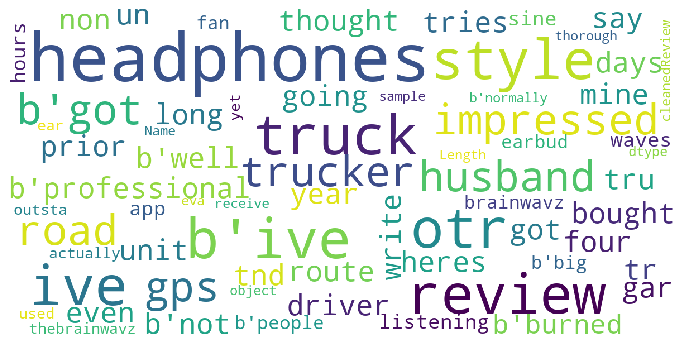



Word Cloud processing completed in 
CPU times: user 324 ms, sys: 9.65 ms, total: 334 ms
Wall time: 341 ms


In [0]:
%%time
#--- WordCloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
  wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=200, max_font_size=40, scale=3, random_state=1).generate(str(data)) # chosen at random by flipping a coin; it was heads
  fig = plt.figure(1, figsize=(12, 10))
  plt.axis('off')
  if title: 
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
  plt.imshow(wordcloud)
  plt.show()

show_wordcloud(Electronics['cleanedReview'])
print()
print()
print("Word Cloud processing completed in ")

### ***4. Sentiment Analysis***

Sentiment Analysis is the automated process of understanding the sentiment or opinion of a given text. This machine learning tool can provide insights by automatically analyzing product reviews and separating them into tags: Positive, Neutral, Negative.

#### ***4.1. Classifying reviews based on sentiment using VaderSentiment***
In this part, I have used a prebuilt library [VaderSentiment](https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f) which is used in predicting the sentiment of a review based on the lexicon arrangement of the words in a review. Also different statergies to actually predict the sentiment for each review by classifying it into Positive, Neutral and Negative reviews. 

- Using naive bayes classifier to generate probabilities for each document 
- based on generated sentiment score on each document, we can classify the review into 3 categories(positive negative and neutral)

In [0]:
#---Function to calculate sentiments using Naive Bayes Analyzer
def NaiveBaiyes_Sentimental(sentence):
    blob = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
    NaiveBayes_SentimentScore=blob.sentiment.classification
    return NaiveBayes_SentimentScore

# VADER sentiment analysis tool for getting Compound score.
def sentimental(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    return score

# VADER sentiment analysis tool for getting pos, neg and neu.
def sentimental_Score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score >= 0.5:
        return 'pos'
    elif (score > -0.5) and (score < 0.5):
        return 'neu'
    elif score <= -0.5:
        return 'neg'

In [0]:
#---- sample run on classifying the sentance
#sentence = 'there is no negative about this product It actually works with zero faults.' #---- Worst Case -- POS but Classified as NEG
#sentence = 'this product is absolutely great.' #---- Best Case -- POS
#sentence = 'this product is absolutely great but with some faults.' #---- Best Case -- NEU
sentence = 'this product actually works with zero faults.' #---- Worst Case -- POS but classified as NEG
sent = sentimental_Score(sentence)
print('The Sentence : \n',sentence)
print('The Sentence is of " ',sent,' " Sentiment.')

The Sentence : 
 this product actually works with zero faults.
The Sentence is of "  neu  " Sentiment.


From the above we can see that some times the library generates a false sentiment. So have implemented a custom Classifier to get the Sentiment of each review.


Sentiment value is calculated for each review and stored in the new column 'Sentiment_Score' of DataFrame 'Electronics'.

As we have generated sentiment scores for all the reviews we can now see what are the most repeated words for positive and negative reviews using a word cloud.

In [0]:
%%time
sentimentAnalysisPath = "/content/drive/My Drive/ODU/CourseWork/CS - 620 | F19 | Intro to Data Science/Project/SentimentAnalysis.pkl"
PositiveReviewsPath = "/content/drive/My Drive/ODU/CourseWork/CS - 620 | F19 | Intro to Data Science/Project/SentimentAnalysis-positive.pkl"
NegativeReviewsPath = "/content/drive/My Drive/ODU/CourseWork/CS - 620 | F19 | Intro to Data Science/Project/SentimentAnalysis-negative.pkl"
NeutralReviewsPath = "/content/drive/My Drive/ODU/CourseWork/CS - 620 | F19 | Intro to Data Science/Project/SentimentAnalysis-neutral.pkl"

positive_data = pd.read_pickle(PositiveReviewsPath)
negative_data = pd.read_pickle(NegativeReviewsPath)
neutral_data = pd.read_pickle(NeutralReviewsPath)

CPU times: user 6.25 s, sys: 1.95 s, total: 8.2 s
Wall time: 24 s


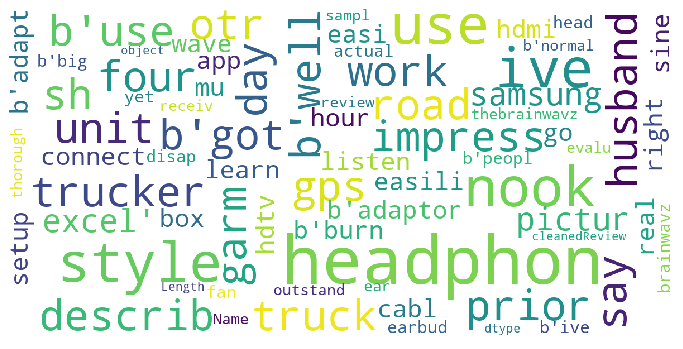


Word Cloud processing completed in 
CPU times: user 320 ms, sys: 11.5 ms, total: 332 ms
Wall time: 331 ms


In [0]:
#---- Positive Reviews
%%time
show_wordcloud(positive_data['cleanedReview'])
print()
print("Word Cloud processing completed in ")

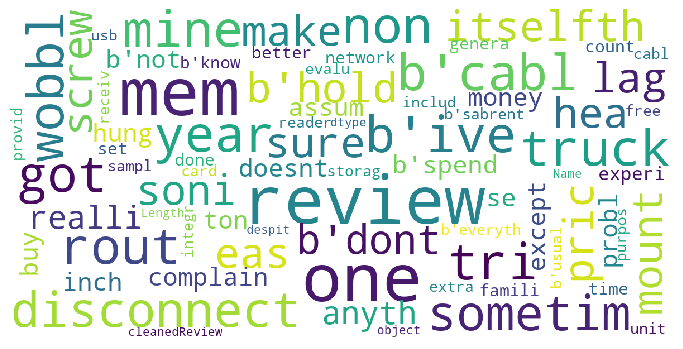


Word Cloud processing completed in 
CPU times: user 332 ms, sys: 7.67 ms, total: 340 ms
Wall time: 339 ms


In [0]:
#---- Negative Reviews
%%time
show_wordcloud(negative_data['cleanedReview'])
print()
print("Word Cloud processing completed in ")

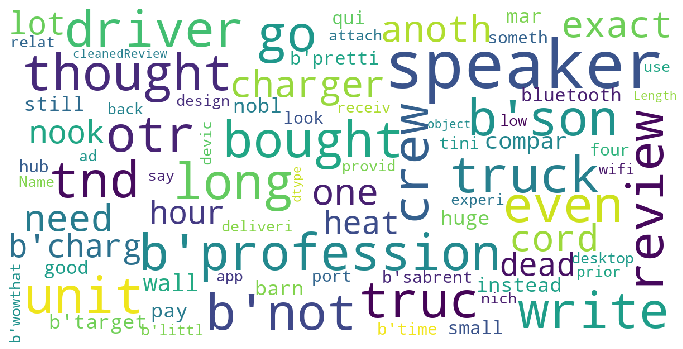


Word Cloud processing completed in 
CPU times: user 318 ms, sys: 11.5 ms, total: 330 ms
Wall time: 330 ms


In [0]:
#---- Neutral Reviews
%%time
show_wordcloud(neutral_data['cleanedReview'])
print()
print("Word Cloud processing completed in ")

In [0]:
Electronics_df = pd.read_json(electronics_path, lines=True)
Electronics_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


#### ***4.2 Building a custom classifier for sentimental analysis of Reviews***

As I want to study sentiment analysis, I wanted to buld a custom classifier that predicts the sentiment of the reviews based on the review summary. 

I have chosen naive bayes and logistic regression as models to classify the sentiment of the reviews.

In [0]:
%%time
dataset_cleaned = pd.read_pickle(sentimentAnalysisPath)
dataset_cleaned.head()

CPU times: user 4.37 s, sys: 752 ms, total: 5.12 s
Wall time: 14.8 s



ignoring the reviews having overall score equal to 3. If the overall score is above 3, then the label for it will be set to Positive else it will be set to Negative

In [0]:
%%time
reviews = dataset_cleaned[dataset_cleaned['overall']!=3]
reviews = reviews[['overall','summary','helpfulVotes','totalVotes']]
print('length of required data : ',len(reviews.overall))

length of required data :  1546931


In [0]:
reviews.head()

,overall,summary,helpfulVotes,totalVotes
0,5,Gotta have GPS!,0,0
1,1,Very Disappointed,12,15
3,2,"Great grafics, POOR GPS",9,10
4,1,"Major issues, only excuses for support",0,0
5,5,HDMI Nook adapter cable,3,3


sentiment column depicts the numeric score of being positive or negative usefulScore column depicts the boolean value of total number of votes

In [0]:
#%%time
reviews["sentiment"] = reviews["overall"].apply(lambda score: "positive" if score > 3 else "negative")
reviews["usefulScore"] = (reviews["helpfulVotes"]/reviews["totalVotes"]).apply(lambda n: "useful" if n > 0.8 else "useless")
reviews.head(5)

,overall,summary,helpfulVotes,totalVotes,sentiment,usefulScore
0,5,Gotta have GPS!,0,0,positive,useless
1,1,Very Disappointed,12,15,negative,useless
3,2,"Great grafics, POOR GPS",9,10,negative,useful
4,1,"Major issues, only excuses for support",0,0,negative,useless
5,5,HDMI Nook adapter cable,3,3,positive,useful


Rows having overall score equal to 5

In [0]:
reviews[reviews.overall == 5].head(5)

,overall,summary,helpfulVotes,totalVotes,sentiment,usefulScore
0,5,Gotta have GPS!,0,0,positive,useless
5,5,HDMI Nook adapter cable,3,3,positive,useful
7,5,A Perfdect Nook HD+ hook up,0,0,positive,useless
9,5,This works great but read the details...,3,3,positive,useful
11,5,great fit,0,0,positive,useless


In [0]:
#Rows having overall score equal to 1
reviews[reviews.overall == 1].head(5)

,overall,summary,helpfulVotes,totalVotes,sentiment,usefulScore
1,1,Very Disappointed,12,15,negative,useless
4,1,"Major issues, only excuses for support",0,0,negative,useless
71,1,"Bought NEW Stand for $25, but mine had the 4 a...",1,2,negative,useless
82,1,What a piece of junk!,8,18,negative,useless
167,1,Beware the TV will not center....folding arm l...,5,7,negative,useless


Assign new dimension to each word and give the word counts

In [0]:
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

reviews["summaryClean"] = reviews["summary"].apply(cleanReviews)

train, test = train_test_split(reviews, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

1237544 items in training data, 309387 in test data


Using TfidfTransformer().fit_transform to fit the train and test data

In [0]:
%%time
countVector = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = countVector.fit_transform(train["summaryClean"])

#applying tfidf to term frequency
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = countVector.transform(test["summaryClean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["sentiment"]
y_test = test["sentiment"]

prediction = dict()

CPU times: user 1min 1s, sys: 426 ms, total: 1min 1s
Wall time: 1min 1s


We use below methods to classify the sentiment of the data.
> 1. ***Multinomial Naïve Bayes learning method***
> 2. ***Logistic regression learning method***

In [0]:
%%time
#--- Naive Bayes
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)

CPU times: user 4.81 s, sys: 2.09 ms, total: 4.81 s
Wall time: 4.81 s


In [0]:
%%time
#--- Logistic Regression
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

CPU times: user 12min 18s, sys: 32min 7s, total: 44min 26s
Wall time: 4min 34s


#### ***4.3 Model Testing***

***Testing the model for few custom reviews***

As we have seen that the predefined library was not generating the sentiments we need, I build a custom classifier, lets test it for few reviews and see how it classifes the sentiment of the review. 

In [0]:
%%time
def testSentiments(model, testData):
    testCounts = countVector.transform([testData])
    testTfidf = tfidf_transformer.transform(testCounts)
    result = model.predict(testTfidf)[0]
    probability = model.predict_proba(testTfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), probability[0], probability[1]))

sentence1 = 'this product is absolutely great.' #---- Best Case -- POS
sentence3 = 'this product is absolutely great but with some faults.' #---- Best Case -- NEU
sentence2 = 'this product actually works with zero faults.' #---- Worst Case -- POS but classified as NEG
sentence4 = 'there is no negative about this product It actually works with zero faults.' #---- Worst Case -- POS but Classified as NEG


testSentiments(logreg, sentence1)
testSentiments(logreg, sentence2)
testSentiments(logreg, sentence3)
testSentiments(logreg, sentence4)

Sample estimated as POSITIVE: negative prob 0.032145, positive prob 0.967855
Sample estimated as POSITIVE: negative prob 0.047064, positive prob 0.952936
Sample estimated as POSITIVE: negative prob 0.113940, positive prob 0.886060
Sample estimated as POSITIVE: negative prob 0.355930, positive prob 0.644070
CPU times: user 80.1 ms, sys: 1.4 ms, total: 81.5 ms
Wall time: 83.6 ms


#### ***4.4 Evaluating the Results***
- Using ROC curve
    
    Using the curve we can see which model has better performance and use that model for testing purpose. 

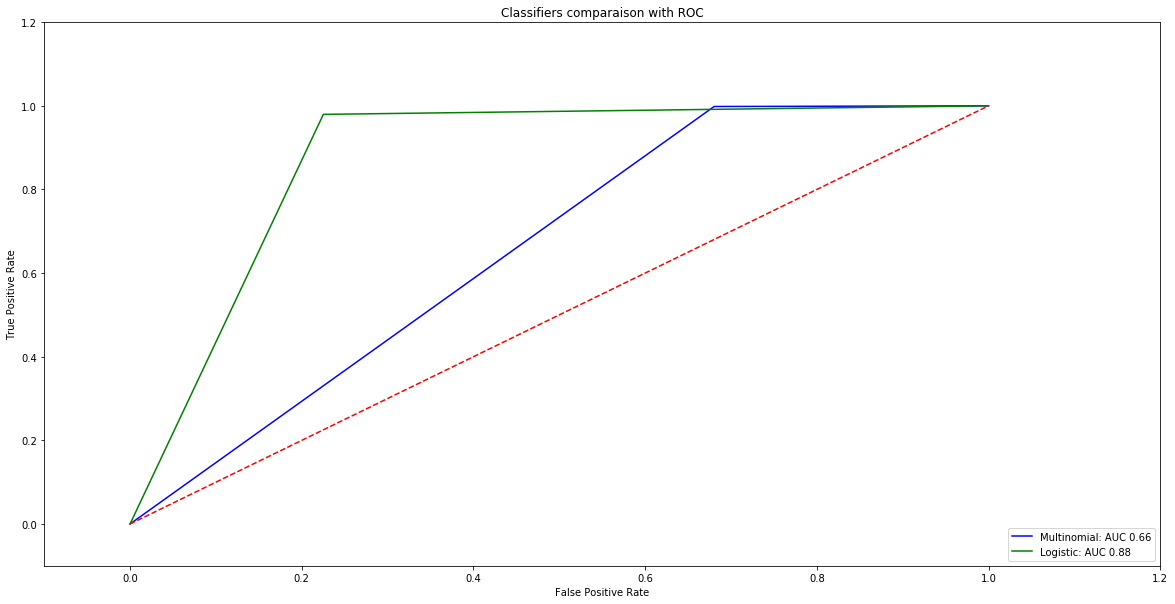

CPU times: user 689 ms, sys: 9.05 ms, total: 698 ms
Wall time: 697 ms


In [0]:
%%time
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

plt.figure(figsize=(20,10)) 
cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

we can see in the above figure that the logistic regression clearly outperforms other model. so lets see the accuracy of logistic regression

Visualize the accuracy, recall and f1-score for Logistic Regression

In [0]:
print(metrics.classification_report(y_test, prediction['Logistic'], target_names = ["positive", "negative"]))

              precision    recall  f1-score   support

    positive       0.84      0.77      0.81     38049
    negative       0.97      0.98      0.97    271338

    accuracy                           0.95    309387
   macro avg       0.91      0.88      0.89    309387
weighted avg       0.95      0.95      0.95    309387



In [0]:
accuracy_score(y_test, prediction['Logistic'])

0.9544098491533257

***Plotting the confusion Matrix***

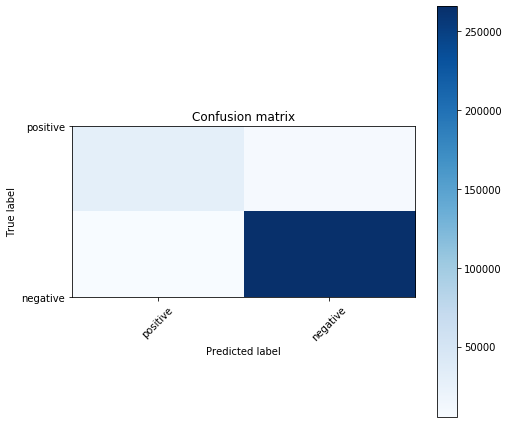

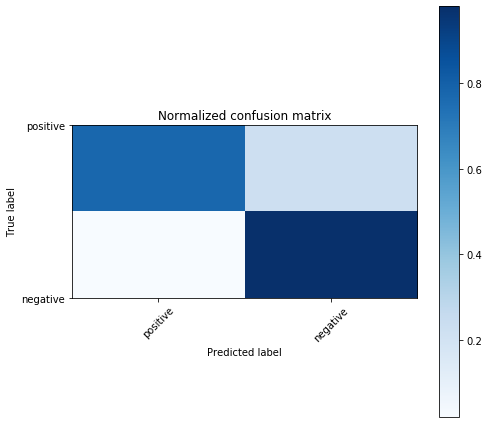

In [0]:
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
matrix = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure(figsize=(7,6))
plot_confusion_matrix(matrix)    

matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(7,6))
plot_confusion_matrix(matrix_normalized, title='Normalized confusion matrix')
plt.show()

Getting the words that classify the best and worst features.

We us the logistic model as it gives the best results

In [0]:
%%time
wordfeaturesPath = '/content/drive/My Drive/ODU/CourseWork/CS - 620 | F19 | Intro to Data Science/Project/wordFeatures.csv'
features = countVector.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(features, logreg_result.coef_[0])),
    columns = ['feature', 'coefficient'])

feature_coefs = feature_coefs.sort_values(by='coefficient')
feature_coefs.to_csv(wordfeaturesPath)
print(feature_coefs.head())

          feature  coefficient
3743973     worst   -28.975713
1224930   garbage   -23.606471
1540567  horrible   -23.247449
3467741   useless   -22.479689
2503195      poor   -22.297487
CPU times: user 25.9 s, sys: 266 ms, total: 26.2 s
Wall time: 27.8 s


Sentiment analysis is performed using logistic regression and Naive Bayes. Also, the user behavior is analyzed and the popular words used by the users are determined.

### ***5. Recommendation system.***

Recommender systems help customers by suggesting probable list of products from which they can easily select the right one. They make customers aware of new and/or similar products available for purchase by providing comparable costs, features, delivery times etc.

Recommender systems have become an integral part of e-commerce sites and other businesses like social networking, movie/music rendering sites. They have a huge impact on the revenue earned by these businesses and also benefit users by reducing the cognitive load of searching and sifting through an overload of data. Recommender systems personalize customer experience by understanding their usage of the system and recommending items they would find useful.

In order recommend a product to a user, we need to understand the user and their preferences. this can be seen from the user interaction with the website. In this case we have user reviews from where we can analyse the user behaviour and work on models to provide personalised Recommendations to the user.

here we start from the user who has given more number of reviews, as this customer is most active in the data.

#### ***5.1 Getting the most reviewed USER***

ADLVFFE4VBT8 -- This reviewer has more than 430 reviews ('MOST REVIEWED PERSON')

name - A. Dent "Aragorn"

In [0]:
MRP = dataset_cleaned[dataset_cleaned['reviewerID'] == 'ADLVFFE4VBT8']
MRP_YCount = MRP.groupby('year')['reviewerID'].count().reset_index()
MRP_YCount=MRP_YCount.rename(columns={'reviewerID':'No_Of_Reviews'})
MRP.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,month,year,cleanedReview,helpfulVotes,totalVotes,Sentiment_Score
5999,ADLVFFE4VBT8,B00002NDRF,"A. Dent ""Aragorn""",This is officially compatible with DYMO's:- La...,4,"Crisp, sticky labels",1298419200,2011-02-23,2,2011,[b'offici compat labelmanag labelpoint labelwr...,3,3,pos
16933,ADLVFFE4VBT8,B00005114Z,"A. Dent ""Aragorn""",Be aware that the A/B does not mean the more f...,5,Good as a color-coordinated cable,1242691200,2009-05-19,5,2009,[b'awar not mean familiar type connector cabl ...,0,0,pos
28413,ADLVFFE4VBT8,B00006343P,"A. Dent ""Aragorn""",There is a reason why this item is so heavily ...,2,Some like it purple,1320364800,2011-11-04,11,2011,[b'reason item heavili discount not productlik...,0,0,neg
33107,ADLVFFE4VBT8,B000067RVL,"A. Dent ""Aragorn""",This is the most common USB cable these days f...,5,It's a good cable but make sure that THIS is w...,1250640000,2009-08-19,8,2009,[b'common usb cabl day connect someth comput b...,184,187,pos
33736,ADLVFFE4VBT8,B000067SGI,"A. Dent ""Aragorn""",Please be VERY careful and look at the picture...,5,Just right but make sure it's what you need,1298246400,2011-02-21,2,2011,[b'pleas care look pictur order cabl not norma...,0,0,pos


Grouping on 'Year' which we got in previous step and getting the count of reviews.

***DISTRIBUTION OF REVIEWS OVER THE YEARS FOR 'A. Dent "Aragorn"'***

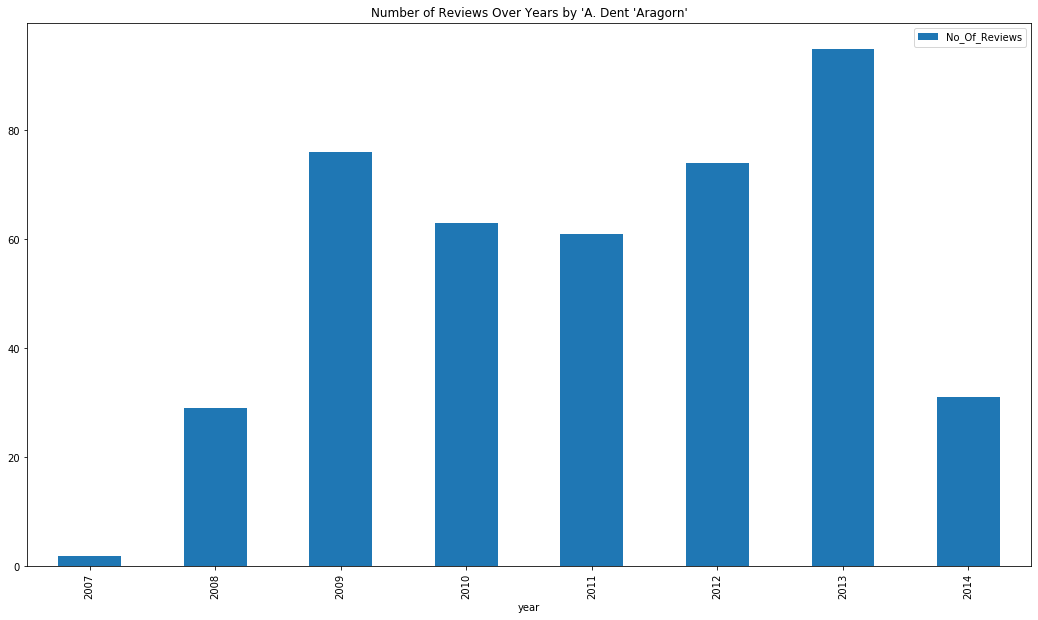

In [0]:
MRP_YCount.plot(x="year",y="No_Of_Reviews",kind="bar",title="Number of Reviews Over Years by 'A. Dent 'Aragorn'", figsize=(18,10))
plt.show()

In [0]:
def ReviewCategory(score):
    if score >= 4:
        return 'pos'
    elif (score <= 2) & (score > 0):
        return 'neg'
    else:
        return 'neu'

In [0]:
MRP['category']=MRP['overall'].apply(lambda x: ReviewCategory(x))

Grouping on 'Category' which we got in previous step and getting the count of reviews.

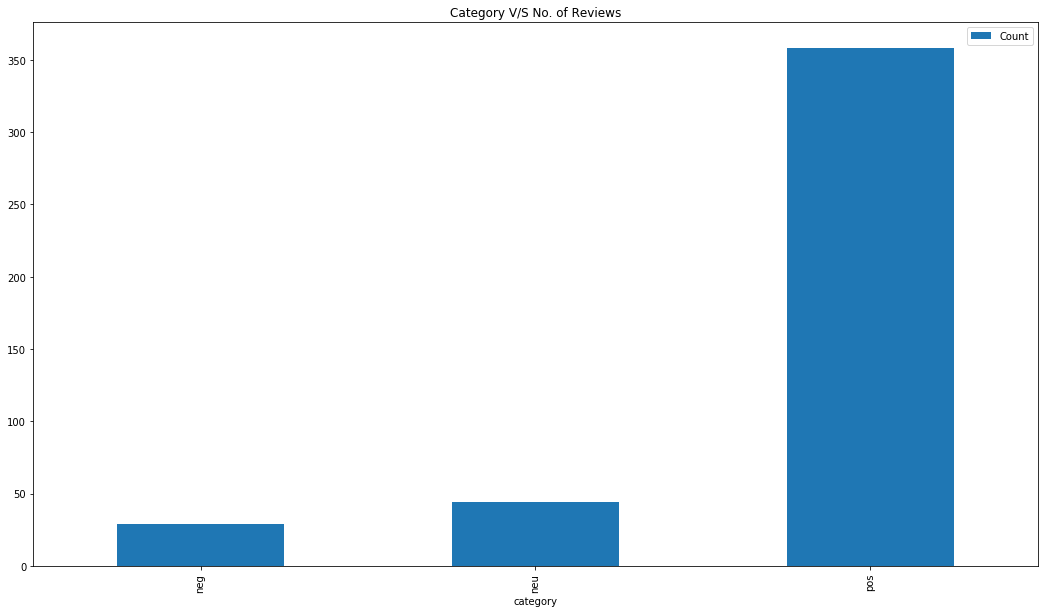

In [0]:
 CategoryCount=MRP.groupby('category')['reviewerID'].count().reset_index()
CategoryCount=CategoryCount.rename(columns={'reviewerID':'Count'})
CategoryCount.plot(x="category",y="Count",kind="bar",title="Category V/S No. of Reviews", figsize=(18,10))
plt.show()

***WORDCLOUD OF ALL IMPORTANT WORDS USED IN 'A. Dent "Aragorn"' REVIEWS ON AMAZON***

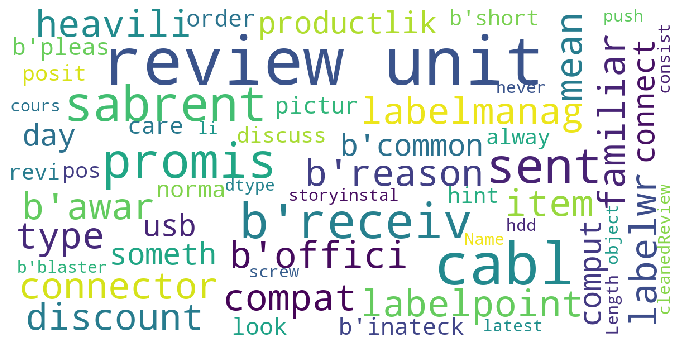


Word Cloud processing completed in 
CPU times: user 299 ms, sys: 9.17 ms, total: 308 ms
Wall time: 306 ms


In [0]:
%%time
show_wordcloud(MRP['cleanedReview'])
print()
print("Word Cloud processing completed in ")

***NUMBER OF DISTINCT PRODUCTS REVIEWED BY 'A. Dent "Aragorn"' ON AMAZON***

In [0]:
len(MRP['asin'].unique())

431

> The user has always reviewed different products

***PRODUCTS REVIEWED BY 'A. Dent "Aragorn"'***

In [0]:
em = electronics_meta[['asin','title']]
Products_Reviewed=pd.merge(MRP,em,on="asin",how="left")
Products_Reviewed=Products_Reviewed[['asin','title','overall']]
Products_Reviewed.head()


,asin,title,overall
0,B00002NDRF,DYMO 45803 High-Performance Permanent Self-Adh...,4
1,B00005114Z,C2G / Cables to Go 13171 USB 2.0 A Male to B M...,5
2,B00006343P,Monster Cable MP HT 850 Home Theatre PowerCent...,2
3,B000067RVL,C2G / Cables to Go 27005 USB 2.0 A to Mini-B C...,5
4,B000067SGI,Tripp Lite U022-006 USB 2.0 Certified Gold (A ...,5


In [0]:
csvpath_MRP = '/content/drive/My Drive/ODU/CourseWork/CS - 620 | F19 | Intro to Data Science/Project/Products_Reviewed.csv'
Products_Reviewed.to_csv(csvpath_MRP)

In [0]:
Product_List=Products_Reviewed["asin"].tolist()
#Product_List

In [0]:
# to make a multilevel list values flat
def make_flat(arr):
    res = []
    for l in arr:
        if isinstance(l, list):
            res.extend(make_flat(l)) 
        else:
            res.append(l)
    return res

In [0]:
electronics_meta[electronics_meta['asin'] == 'B00127VF68'].categories

93157    [[Electronics, Portable Audio & Video, MP3 Pla...
Name: categories, dtype: object

***POPULAR SUB-CATEGORY FOR 'A. Dent "Aragorn"'***

In [0]:
print(electronicsCategories.subCategory1.unique())
#print(electronicsCategories.subCategory2.unique())
#print(electronicsCategories.subCategory3.unique())


['Computers & Accessories' 'Accessories & Supplies' 'GPS & Navigation'
 'eBook Readers & Accessories' 'Car & Vehicle Electronics'
 'Camera & Photo' 'Portable Audio & Video' 'Television & Video'
 'Home Audio' 'Security & Surveillance' 'Electronics Warranties'
 'Service & Replacement Plans' 'Cell Phones & Accessories']


In [0]:
%%time
import collections

pop_catg=[]
for p in Product_List:
  pop_catg.append(make_flat(electronics_meta[electronics_meta['asin'] == p].categories))
  pop_catg= make_flat(pop_catg)
print(pop_catg)

['Electronics', 'Accessories & Supplies', 'Office Electronics Accessories', 'Labeling Tapes', 'Electronics', 'Computers & Accessories', 'Cables & Accessories', 'Cables & Interconnects', 'USB Cables', 'Electronics', 'Computers & Accessories', 'Cables & Accessories', 'Surge Protectors', 'Electronics', 'Computers & Accessories', 'Cables & Accessories', 'Cables & Interconnects', 'USB Cables', 'Electronics', 'Computers & Accessories', 'Cables & Accessories', 'Cables & Interconnects', 'USB Cables', 'Electronics', 'Accessories & Supplies', 'Batteries, Chargers & Accessories', 'Power Strips', 'Electronics', 'Accessories & Supplies', 'Audio & Video Accessories', 'Cables & Interconnects', 'Audio Cables', 'Speaker Cables', 'Electronics', 'Computers & Accessories', 'Electronics', 'Accessories & Supplies', 'Audio & Video Accessories', 'Cables & Interconnects', 'Video Cables', 'HDMI Cables', 'Electronics', 'Computers & Accessories', 'Cables & Accessories', 'Mice', 'Electronics', 'Computers & Accesso

In [0]:
%%time
top_catg=collections.Counter(pop_catg).most_common(11)
top_catg
top5=[]
for x in top_catg[1:6]:
    top5.append(x[0])
top5=pd.DataFrame(top5,columns=['Sub-Category'])
print(top5.head())

                Sub-Category
0    Computers & Accessories
1       Cables & Accessories
2     Accessories & Supplies
3  Audio & Video Accessories
4     Cables & Interconnects
CPU times: user 5.99 ms, sys: 420 µs, total: 6.41 ms
Wall time: 6.11 ms


***PRICE RANGE IN WHICH 'A. Dent "Aragorn"' SHOPS***

In [0]:
Price_Range_dataset=electronics_meta[['asin','title','price']]
Price_Range_dataset=pd.merge(MRP,Price_Range_dataset,on="asin",how="left")
print('Average Price for A. Dent "Aragorn" shopped : ',Price_Range_dataset.price.mean())
print('Minimum Price for A. Dent "Aragorn" shopped : ',Price_Range_dataset.price.min())
print('Maximum Price for A. Dent "Aragorn" shopped : ',Price_Range_dataset.price.max())

Average Price for A. Dent "Aragorn" shopped :  70.04099273607763
Minimum Price for A. Dent "Aragorn" shopped :  0.42
Maximum Price for A. Dent "Aragorn" shopped :  929.99


In [0]:
electronics_meta.head()
#electronics_meta.loc[2].related

,asin,description,categories,title,price,salesRank,related,brand
0,0132793040,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


#### ***5.2 Building a Recommendation System***

***Product based Collaborative Filtering (Item Based)***

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/05/1skK2fqWiBF7weHU8SjuCzw.png)

In [0]:
dataset_cleaned.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,month,year,cleanedReview,helpfulVotes,totalVotes,Sentiment_Score
0,AO94DHGC771SJ,0528881469,amazdnu,We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,2013-06-02,6,2013,[b'got gps husband otr road trucker impress sh...,0,0,pos
1,AMO214LNFCEI4,0528881469,Amazon Customer,"I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,2010-11-25,11,2010,[b'profession otr truck driver bought tnd truc...,12,15,neu
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,2010-09-09,9,2010,[b'well say ive unit truck four day prior garm...,43,45,pos
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,2010-11-24,11,2010,[b'not go write long review even thought unit ...,9,10,neu
4,A24EV6RXELQZ63,0528881469,Wayne Smith,I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,2011-09-29,9,2011,[b'ive mine year here got tri rout non truck r...,0,0,neg


In [0]:
%%time
count = dataset_cleaned.groupby("asin", as_index=False).count()
mean = dataset_cleaned.groupby("asin", as_index=False).mean()
dfMerged = pd.merge(dataset_cleaned, count, how='right', on=['asin'])
dfMerged.head()

CPU times: user 5.06 s, sys: 51.3 ms, total: 5.11 s
Wall time: 5.11 s


In [0]:
#rename column
dfMerged["totalReviewers"] = dfMerged["reviewerID_y"]
dfMerged["overallScore"] = dfMerged["overall_x"]
dfMerged["summaryReview"] = dfMerged["summary_x"]

dfNew = dfMerged[['asin','summaryReview','overallScore',"totalReviewers"]]

In [0]:
dfMerged = dfMerged.sort_values(by='totalReviewers', ascending=False)
dfCount = dfMerged[dfMerged.totalReviewers >= 100]
dfCount.head()

,reviewerID_x,asin,reviewerName_x,reviewText_x,overall_x,summary_x,unixReviewTime_x,reviewTime_x,month_x,year_x,cleanedReview_x,helpfulVotes_x,totalVotes_x,Sentiment_Score_x,reviewerID_y,reviewerName_y,reviewText_y,overall_y,summary_y,unixReviewTime_y,reviewTime_y,month_y,year_y,cleanedReview_y,helpfulVotes_y,totalVotes_y,Sentiment_Score_y,totalReviewers,overallScore,summaryReview
1339430,A3U4AFML9SZPWK,B007WTAJTO,"Leith Tussing ""I like tacos.""",I bought these for my ELPH 520 more for speed ...,5,Super fast memory card,1371945600,2013-06-23,6,2013,[b'bought elph speed space want use rapid phot...,0,0,neu,4915,4914,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,5,Super fast memory card
1339888,A2DIQTZPF26T1L,B007WTAJTO,M. Nichols,the card arrived promptly in good condition. i...,5,"great price, good value",1364169600,2013-03-25,3,2013,[b'card arriv prompt good condit dont use exfa...,1,1,pos,4915,4914,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,5,"great price, good value"
1339895,A21MMTDAFAUPQT,B007WTAJTO,mollie,well what can you say for the card it has plen...,5,room to record,1358208000,2013-01-15,1,2013,[b'well say card plenti memori cam wouldnt wor...,0,0,pos,4915,4914,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,5,room to record
1339894,AM1T7QCP4B8EW,B007WTAJTO,mojo,Phone's internal memory was nearly always full...,5,Gave my internal memory on my Samsung Galaxy S...,1394409600,2014-03-10,3,2014,[b'phone intern memori near alway full obvious...,0,0,neu,4915,4914,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,5,Gave my internal memory on my Samsung Galaxy S...
1339893,A3T6Z4XWXWGEEN,B007WTAJTO,Mohnish,"Excellent product, comes with an full size SD ...",5,10MBps writes + 32MBps reads - Fabulous!,1369008000,2013-05-20,5,2013,[b'excel product come full size card adapt con...,0,0,neu,4915,4914,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,4915,5,10MBps writes + 32MBps reads - Fabulous!


***Grouping all the summary Reviews by product ID***

In [0]:
%%time
product_review_path = "/content/drive/My Drive/ODU/CourseWork/CS - 620 | F19 | Intro to Data Science/Project/ProductReviewSummary.csv"
dfProductReview = dataset_cleaned.groupby("asin", as_index=False).mean()
ProductReviewSummary = dfCount.groupby("asin")["summaryReview"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)
ProductReviewSummary.to_csv(product_review_path)
dfProductReview.head()

CPU times: user 1.87 s, sys: 36 ms, total: 1.9 s
Wall time: 1.96 s


In [0]:
dfProductReview.head()

,asin,overall,unixReviewTime,month,year,helpfulVotes,totalVotes
0,0528881469,2.400000,1.310515e+09,9.200000,2010.800000,12.800000,14.000000
1,0594451647,4.200000,1.396328e+09,3.600000,2014.000000,1.200000,1.200000
2,0594481813,4.000000,1.382789e+09,5.750000,2013.375000,1.250000,1.625000
3,0972683275,4.461187,1.354240e+09,6.205479,2012.438356,0.945205,1.351598
4,1400501466,3.953488,1.352373e+09,5.813953,2012.418605,4.325581,5.279070


In [0]:
ProductReviewSummary.head()

,summaryReview
asin,
0972683275,"[Easy to Mount; Rock-solid, Works as advertise..."
1400532655,"[Good for the money, A great device if you are..."
B00000J1V5,"[works, Somewhere in between., A cable is a ca..."
B00000JDF5,"[Best price I found, Good Cable, Does what it'..."
B00000K135,"[Yes, it's a refill, Four Stars, Even if you d..."


In [0]:
df3 = pd.read_csv(product_review_path)
df3 = pd.merge(df3, dfProductReview, on="asin", how='inner')
df3 = df3[['asin','summaryReview','overall']]
df3.head()

,asin,summaryReview,overall
0,0972683275,"['Easy to Mount; Rock-solid', 'Works as advert...",4.461187
1,1400532655,"['Good for the money', 'A great device if you ...",3.807339
2,B00000J1V5,"['works', 'Somewhere in between.', 'A cable is...",4.712644
3,B00000JDF5,"['Best price I found', 'Good Cable', ""Does wha...",4.718121
4,B00000K135,"[""Yes, it's a refill"", 'Four Stars', ""Even if ...",4.509259


***Text Cleaning - Summary column***

In [0]:
#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

In [0]:
#reset index and drop duplicate rows
df3["summaryClean"] = df3["summaryReview"].apply(cleanReviews)
df3 = df3.drop_duplicates(['overall'], keep='last')
df3 = df3.reset_index()

In [0]:
reviews = df3["summaryClean"] 
countVector = CountVectorizer(max_features = 300, stop_words='english') 
transformedReviews = countVector.fit_transform(reviews) 

dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
dfReviews = dfReviews.astype(int)

In [0]:
#save 
dfreviews_path = "/content/drive/My Drive/ODU/CourseWork/CS - 620 | F19 | Intro to Data Science/Project/dfReviews.csv"
dfReviews.to_csv(dfreviews_path)

In [0]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

# KNN classifier to find similar products
print(lentrain)
print(lentest)

2174
242


In [0]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [0]:

#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B009XE0504  average rating is  3.644230769230769
The first similar product is  B005I7KIUW  average rating is  4.30188679245283
The second similar product is  B004R2VMWC  average rating is  3.977272727272727
-----------------------------------------------------------
Based on product reviews, for  B009XNBFJK  average rating is  3.7972972972972974
The first similar product is  B0075W8E4A  average rating is  3.3653846153846154
The second similar product is  1400532655  average rating is  3.8073394495412844
-----------------------------------------------------------
Based on product reviews, for  B009YC3Y08  average rating is  4.085470085470085
The first similar product is  B007SP36ZG  average rating is  3.937984496124031
The second similar product is  B007C0Y8NQ  average rating is  3.8518518518518516
-----------------------------------------------------------
Based on product reviews, for  B009YQ8BTI  average rating is  4.526315789473684
The first similar pr

***Predicting Review Score***

In [0]:

df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           3       0.40      0.50      0.45        34
           4       0.92      0.88      0.90       208

    accuracy                           0.83       242
   macro avg       0.66      0.69      0.67       242
weighted avg       0.84      0.83      0.83       242



#### ***5.3 Model Evaluation***

***Accuracy of the model***

predicting the accuracy of the model by comparing the number of true positives. and true negatives.

***Mean Square Error***

Measures average squared error of our predictions.
For each point, it calculates square difference between the predictions and the target and then average those values.

In [0]:
print('Accuracy Score : ',accuracy_score(df5_test_target, knnpreds_test))
print('Mean Square Error : ',mean_squared_error(df5_test_target, knnpreds_test))

Accuracy Score :  0.8264462809917356
Mean Square Error :  0.17355371900826447


### ***6. Conclusion and Future work***

- Performed Exploratory Data Analysis on dataset to come up with insights such as rating, review trends over the years, range of ratings every year, helpfullness of the reviews, price range of products.

- Feature Extraction using TF-IDF vectorization for both the problems.

- ***Sentiment Analysis*** : Given a product and its reviews and ratings along with helpfullness score, predict the sentiment of review, whether the reveiw is 'positive' or 'negative'. 

  Logistic Regression is comes out to be the best model to classify the sentiment of reviews.

- ***Recommender System*** : Given a product and its reviews and ratings along with helpfullness score, recommended the next best product based on the review summary and the overall rating. 

- For recommendations, Analysing most reveiewed user help us to understand user behaviour. Applied K-Nearest Neighbours with k=2 is used to get 2 nearest products based on review summary and overall review score, recomemnd the products to the user.



#### 6.1 ***Future Work***

- Customize the recommender for remaining product categories in Amazon Review dataset would be the next step. This recommender makes use of ratings, summary of review given by users. Making use of review text given by users would be interesting as a further step.
- Analysing whole reviews and Predicting the sentiment 
- Finding more patterns in the data to make more accurate recommendations.
- apply advanced techniques like BERT, wor2Vec to generate more presonalized recommendations.

### ***7. Summary***

***Title*** : Analyzing Amazon Product Reviews Data

***Name*** : Herambeshwar Pendyala 

***UIN*** : 01130541

***Why ??*** 

- E-commerce has revolutionized the way we shop. Everything we search are just a  few clicks away. Items are being delivered within a matter of days (sometimes even the same day!). Amazon is one such platform that has a huge impact in E-commerce industry.

- Many times while purchazing an item online, people see the product’s, ratings reviews before deciding whether to buy it or not.

- Online product reviews are a great source of information for the Organization. They can analyze this data to imporve the customer satisfaction and increase revenue.

- With such Humongous review data available, My target was to analyze the data, find patterns to classify the products,find the best product and recommend it to the user. For that I have used below approaches. 

1. Sentiment Analysis : To certify whether the product is be good or bad.
2. Recommender System : recommend the next best product to the user.

***Dataset*** 

Amazon Customer Reviews (a.k.a. Product Reviews) is a database with data from a a period of over two decades from 1995 to 2014, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. Over 130+ million customer reviews are available to researchers as part of this dataset.

- As this is a very huge dataset(~140GB), I have chosen ***'Electronics'*** category to perform Analysis and generate insights that adress the problem statement.

***Observations from Exploratory Data Analysis***

![alt text](https://www.cs.odu.edu/~hpendyal/courses/cs620/project/images/EDA-1.PNG)

- we can see the reviews trend over the years which shows the increased usage of website which inturn tells us the brand Amazon is now.
- The number of reviews generated per month in every year, gives us a basic idea of online shopping pattern.
- Analysing the overall rating of the products, to get most rated product, most popular brand etc.
- see how helpful the reviews are from their helpfullness score.

Based on this insights I moved on to data modelling.

***Sentiment Analysis***

sentiment analysis is a NLP technique used to identify and classify the information to be positive or negative.

- ***Modelling***

    Naive Bayes Classifier

    Logistic regression Classifier

- ***Evaluation***

    ROC Curve

![alt text](https://www.cs.odu.edu/~hpendyal/courses/cs620/project/images/ROC.PNG)

- Based on the ROC curve we can see that Logistic regression performs better than naive bayes to classify the sentiment of reviews.

    ***Precision, Recall, F1-score and Accuracy***

![alt text](https://www.cs.odu.edu/~hpendyal/courses/cs620/project/images/PRF1-logistic.PNG)

  ***Test Accuracy*** : 0.9544098491533257

***Recommender System***

Recommendation system is a filtering system that seeks to predict the next best item based on the user preference and rating and recommend it to the user.

- ***Modelling***

    Item-Based Collaborative filtering using K-Nearest Neighbours(K = 2)

- ***Evaluation***

    ***Recommendation Test***

    -----------------------------------------------------------
    Based on product reviews, for  B00INNP5VU  average rating is  4.045267489711934
    
    The first similar product is  B008B1125W  average rating is  4.154696132596685
    
    The second similar product is  B005JACJ50  average rating is  4.52972972972973

    -----------------------------------------------------------
    Based on product reviews, for  B00IVPU786  average rating is  4.7975460122699385
    
    The first similar product is  B009SK57HY  average rating is  4.445783132530121
    
    The second similar product is  B005TUQV0E  average rating is  4.638655462184874
    
    -----------------------------------------------------------

    ***Precision, Recall, F1-Score and Accuracy***
    
    ![alt text](https://www.cs.odu.edu/~hpendyal/courses/cs620/project/images/Recommend-KNN.PNG)

    ***Test-Accuracy*** : 0.8264462809917356

    ***Mean-Square Error*** : 0.17355371900826447

***Conclusion*** 

- Performed Exploratory Data Analysis on dataset to come up with insights such as rating trends over the years, range of ratings every year, helpfullness of the reviews, price range of products.

- Feature Extraction using TF-IDF vectorization for both the problems.

- ***Sentiment Analysis*** : Given a product and its reviews and ratings along with helpfullness score, predict the sentiment of review, whether the reveiw is 'positive' or 'negative'. 

  Logistic Regression is comes out to be the best model to classify the sentiment of reviews.

- ***Recommender System*** : Given a product and its reviews and ratings along with helpfullness score, recommended the next best product based on the review summary and the overall rating. 

- For recommendations, Analysing most reveiewed user help us to understand user behaviour. Applied K-Nearest Neighbours with k=2 is used to get 2 nearest products based on review summary and overall review score, recomemnd the products to the user.

  ![alt text](http://rejoiner.com/resources/wp-content/uploads/2016/06/reco-based-purchase.png)

***Future Work***  
- Analysing whole reviews and Predicting the sentiment 
- Finding more patterns in the data to make more accurate recommendations.

### ***8. References***
---
1. Amazon Review Data: Spotting Trends and Fake Reviews, https://dzone.com/articles/100-shades-of-grey
2. Sentiment-analysis-on-Amazon-Reviews-using-Python, https://github.com/Maha41/Sentiment-analysis-on-Amazon-Reviews-using-Python
3. An experiment on recommender systems, https://github.com/tomaspdc/amazon-recsys
4. Amazon Product Data, http://jmcauley.ucsd.edu/data/amazon/index.html
5. consumer-reviews-of-amazon-products, https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products
6. mining-online-reviews-topic-modeling-lda, https://www.analyticsvidhya.com/blog/2018/10/mining-online-reviews-topic-modeling-lda/
7. predicting-sentiment-of-amazon-product-reviews, https://towardsdatascience.com/predicting-sentiment-of-amazon-product-reviews-6370f466fa73
8. Sentiment-Analysis-of-Amazon-review-data, 9. https://github.com/JagruthiSPrabhudev/Sentiment-Analysis-of-Amazon-review-data
9. Making Sense of Millions of Amazon Reviews Using SQL, Spark and Python — Big Data Project, https://mystudentvoices.com/making-sense-of-millions-of-amazon-reviews-using-sql-spark-and-python-5f4505316daf
10. Amazon review Sentiment, http://sambarrows.com/Amazon_review_sentiment/
11. Amazon Product Recommendation System, https://towardsdatascience.com/product-recommender-using-amazon-review-dataset-e69d479d81dd
12. Amazon Product Recommendation, https://github.com/mandeep147/Amazon-Product-Recommender-System
13. Amazon Product Recommendationhttps://github.com/smwitkowski/Amazon-Recommender-System
14. Building a Recommendation System, https://medium.com/datadriveninvestor/how-to-build-a-recommendation-system-for-purchase-data-step-by-step-d6d7a78800b6
15. Amazon-Product-recommendation, https://github.com/nihal223/Amazon-Product-Recommendation-System
16. Amazon-Recommendations, https://www.cs.umd.edu/~samir/498/Amazon-Recommendations.pdf
17. Comparision of Amazon Recommendation Systems, http://www.eden.rutgers.edu/~rr966/data/DM%20-%20Comparison%20of%20Recommendation%20Systems%20on%20Amazon%20Review%20DataSet.pdf
18. Analyzing Amazon Reviews , https://gist.github.com/cyanamous/8285f8c3b1677d6f57a3366b5a9d5728
19. Statistical analysis, https://minimaxir.com/2014/06/reviewing-reviews/
20. https://towardsdatascience.com/review-rating-prediction-a-combined-approach-538c617c495c
21. https://www.nickkolenda.com/customer-reviews/



**Learning**

---

1. Yield, https://www.geeksforgeeks.org/use-yield-keyword-instead-return-keyword-python/

2. Asterick(*) in python, https://medium.com/understand-the-python/understanding-the-asterisk-of-python-8b9daaa4a558

3. Pyspark Installation, https://stackoverflow.com/questions/55548075/unable-to-install-pyspark-on-google-colab

4. Word Cloud, https://www.datacamp.com/community/tutorials/wordcloud-pytho

5. Sentiment Analysis using VADER, https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

6. Storing File format, https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d

